In [1]:
## ############################################################################################################################################################################
## CODE      : DELORAN: ORBIT CALCULATOR
## AUTHOR    : MATIAS BLAÑA D.(main dev.), ROY BUSTOS (dev. Setup Malin1-extragalactic)
## LOCATION  : CHILE, SANTIAGO JANUARY 2024
## VERSION   : (v1.1) ORBIT CALCULATOR FOR MW DWARF SATELLITES INCLUDING MW MULTIPLE POTENTIALS and M31, AND Fornax Cluster potentials, WITH ORBITS WITH COSMIC EXPANSION OPTIONS
## SCRIPT    : EXAMPLES OF WORKSCRIPTS FOR USERS THAT LOADS STORED INITIAL CONDITIONS, INTEGRATIONS ROUTINES, DEFINE OBSERVABLES, ETC
## REFERENCES: PLEASE CITE THE ARTICLE WHERE DELOREAN WAS ORIGINALY PUBLISHED: Blaña et al. 2020, MNRAS, 497,3601-3622
## URL       : https://ui.adsabs.harvard.edu/abs/2020MNRAS.497.3601B/abstract
## ############################################################################################################################################################################

In [2]:
import sys
sys.path.append('Code')
from DELOREAN_v1 import *

directory  /data4/mblana/Research/DELOREAN/DELOREANv1
 
DELOREAN LOADED WITH 1.21GW: GODSPEED USER
             _           _           
    ________|_\         /_|________  
    \_______-''=.     .=''-_______/  
               \\    //             
           _____\\__//_____         
         .'                '.        
       _'______________.- -._'_      
      /  _____________________ \     
      |/[_][_]____DMC___[_][_]\|     
      \___<_>____________<_>___/     
      |\___================___/|     
      |__|'                '|__|     
                                     


## Examples for orbit calculations

integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 1 of 64
npars=3
 One orbit took 0.5322260856628418 s
 All will take 0.026614582538604735 min
 Running time 0.5323014259338379 s
orbit n=2/3 (66%)
 Running time 1.0450592041015625 s
orbit n=3/3 (100%)
 Running time 5.415329933166504 s
All calculations finished after 5.42 s, 0.09 min, 0.00 hrs
fig NOT saved


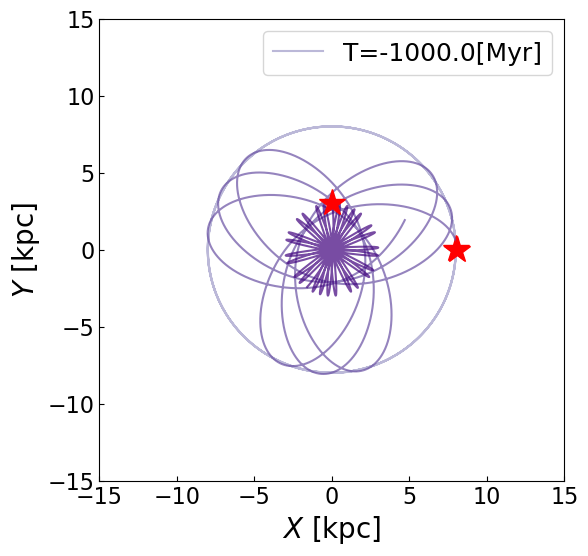

In [3]:
#######################################################
## EXAMPLE 1: Calculate orbits in a Milky Way potential
#######################################################
Testorbit1           = Galaxy()
Testorbit1.name      = 'Testorbit1'
Testorbit1.ncpu      = 1
Testorbit1.setup     = MySetup(setup_name='Setup:Blana2020', case='case1').setup
Testorbit1.coordtype = 'Cartesian'
# Testorbit1.orbprop   = True
# Testorbit1.paramtime = [0, -1000, 0.1]
Testorbit1.paramtime = [0, -250*4, 0.1] # t_init, t_fin, dt
# x,y,z,vx,vy,vz     = 2.0,0.01,0., 0.,10.,0.
x,y,z,vx,vy,vz       = 8.,0.,0., 0.0,195.,0.
# x,y,z,vx,vy,vz       = 8.,0.,0., 0.0,90.,0.
Testorbit1.paramvars = [[x,y,z,vx,vy,vz]]
x,y,z,vx,vy,vz      = 8.1,0.,0.,   0.0,-90.,0.
# x,y,z,vx,vy,vz       = 4.,0.,0.0,   0.0,10.,0.   
Testorbit1.paramvars.append([x,y,z,vx,vy,vz])
x,y,z,vx,vy,vz       = 0.,3.,0.,   -10.0,00.,0.
Testorbit1.paramvars.append([x,y,z,vx,vy,vz])
listobjects_init     = [Testorbit1]
listobjects_out      = ExploreParam_v2(listobjects_init)
Testorbit1           = listobjects_out[0]
plotorbplaneXY(Testorbit1,L=15,path='Data/Data_Outputs/Figs/fig_')

integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 1 of 64
npars=3
 One orbit took 0.7920823097229004 s
 All will take 0.039607572555541995 min
 Running time 0.7921626567840576 s
orbit n=2/3 (66%)
 Running time 1.5786278247833252 s
orbit n=3/3 (100%)
 Running time 3.300516366958618 s
All calculations finished after 3.30 s, 0.06 min, 0.00 hrs
fig NOT saved


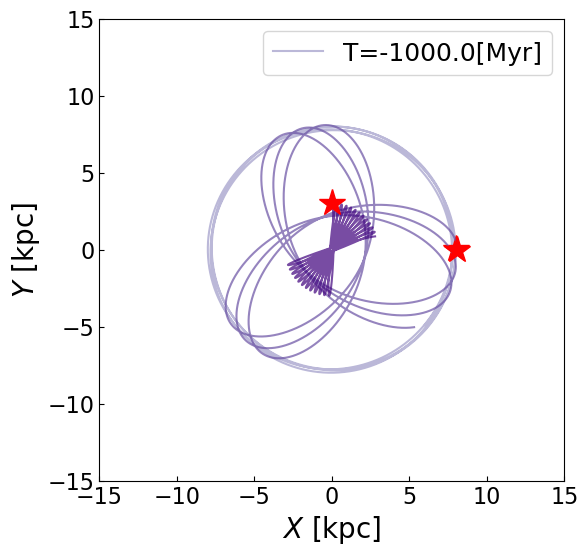

In [4]:
###############################################################
## EXAMPLE 1b: Calculate orbits in a Milky Way barred potential 
###############################################################
Testorbit1b           = Galaxy()
Testorbit1b.name      = 'Testorbit1b'
Testorbit1b.setup     = MySetup(setup_name='Setup:Blana2020', case='case_bar1').setup
Testorbit1b.coordtype = 'Cartesian'
Testorbit1b.ncpu      = 1
Testorbit1b.paramtime = [0, -250*4, 0.1] # t_init, t_fin, dt
# x,y,z,vx,vy,vz     = 2.0,0.01,0., 0.,10.,0.
x,y,z,vx,vy,vz       = 8.,0.,0., 0.0,195.,0.
# x,y,z,vx,vy,vz       = 8.,0.,0., 0.0,90.,0.
Testorbit1b.paramvars = [[x,y,z,vx,vy,vz]]
x,y,z,vx,vy,vz      = 8.1,0.,0.,   0.0,-90.,0.
# x,y,z,vx,vy,vz       = 4.,0.,0.0,   0.0,10.,0.   
Testorbit1b.paramvars.append([x,y,z,vx,vy,vz])
x,y,z,vx,vy,vz       = 0.,3.,0.,   -10.0,00.,0.
Testorbit1b.paramvars.append([x,y,z,vx,vy,vz])
listobjects_init     = [Testorbit1b]
listobjects_out      = ExploreParam_v2(listobjects_init)
Testorbit1b           = listobjects_out[0]
plotorbplaneXY(Testorbit1b,L=15,path='Data/Data_Outputs/Figs/fig_')

In [5]:
#######################################################
## EXAMPLE 1c: Calculate star cluster orbits in a Milky Way potential
## EXAMPLE: taking data from https://people.smp.uq.edu.au/HolgerBaumgardt/globular/ NOTE that Baumgardt/Vasilieve take X = -XGC (GalactoCentric)
#######################################################
Testorbit1c           = Galaxy()
Testorbit1c.name      = 'Testorbit1c'
Testorbit1c.ncpu      = 1
Testorbit1c.setup     = MySetup(setup_name='Setup:Blana2020', case='case1').setup
Testorbit1c.coordtype = 'Equatorial'
Testorbit1c.usebaumgardtcoord = False
Testorbit1c.orbprop   = True
Testorbit1c.paramtime = [0, -1000, 0.1]
############################################################################
###### Loading example of coordinates ######################################
ra,dec,dist,vlos,pmac,pmd  = 201.696991,-47.479473,5.430, 232.78,-3.236,-6.731  # Omega Cen: [deg, deg, kpc, km/s, mas/yr, mas/yr]
Testorbit1c.paramvars      = [[ra,dec,dist,vlos,pmac,pmd]]
ra,dec,dist,vlos,pmac,pmd  = 6.023792,-72.081306,4.52,-17.45,5.253,-2.557 # 47 Tuc: [deg, deg, kpc, km/s, mas/yr, mas/yr]
Testorbit1c.paramvars.append([ra,dec,dist,vlos,pmac,pmd])
### Or you can generate/load your coordinates here #########################
## ... ##

############################################################################
listobjects_init     = [Testorbit1c]
listobjects_out      = ExploreParam_v2(listobjects_init) ## Running the code
Testorbit1c          = listobjects_out[0]
############################################################################
### Saving orbit files #####################################################
pathoutputs = "Data/Data_Outputs/StarClusters/"
namefile    = "Testorbit1c.pkl"
# os.system("rm "+pathoutputs+namefile)
with open(pathoutputs+namefile, 'wb') as output:
    pickle.dump(Testorbit1c, output, pickle.HIGHEST_PROTOCOL)


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 1 of 64
npars=2
 One orbit took 1.433922290802002 s
 All will take 0.04780294895172119 min
 Running time 1.4341001510620117 s
orbit n=2/2 (100%)
 Running time 2.811990737915039 s
All calculations finished after 2.81 s, 0.05 min, 0.00 hrs


fig saved in  Data/Data_Outputs/StarClusters/Figs/fig_orbitXYZ_Testorbit1c.pdf


/tmp/ipykernel_20908/2993516853.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[ind].set_yticklabels([str(format(label, '.2f')) for label in labels_e])


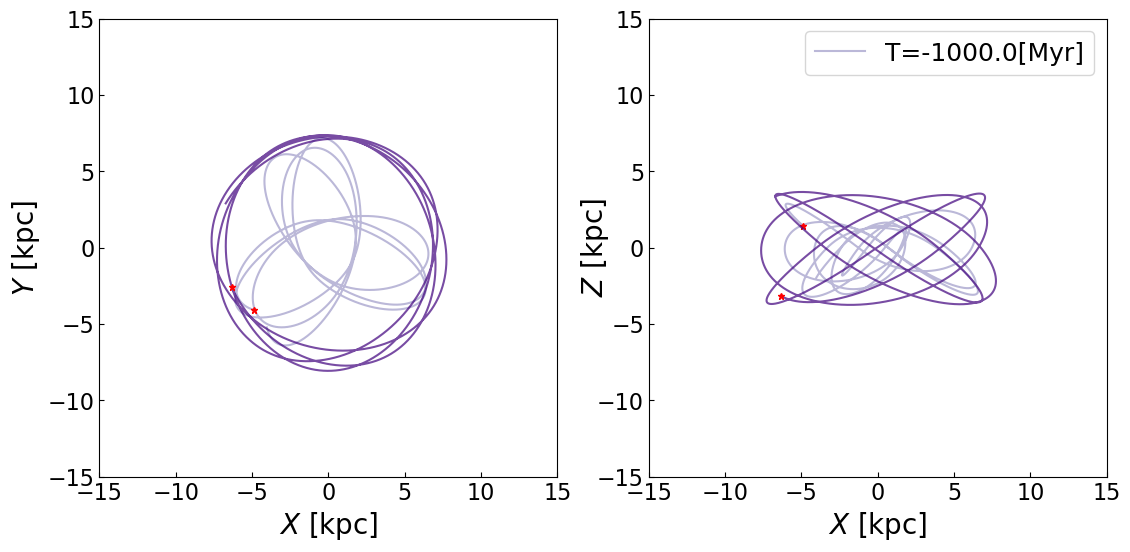

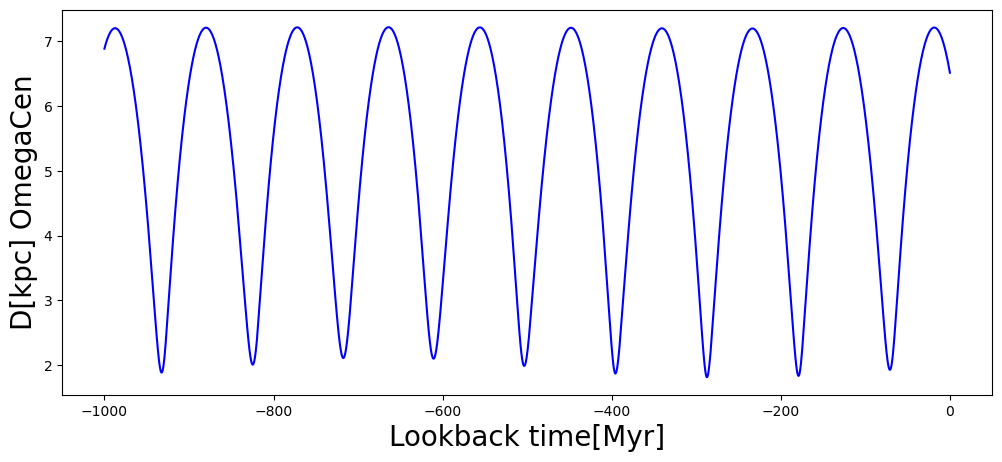

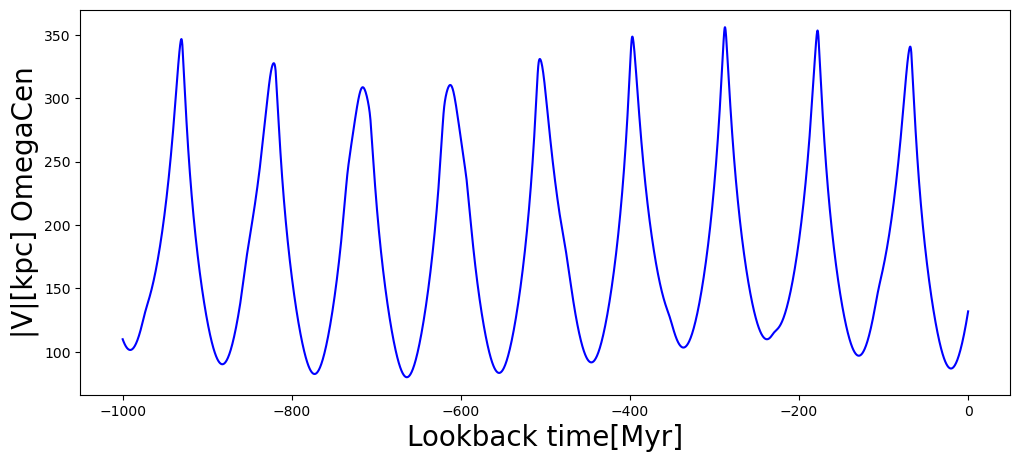

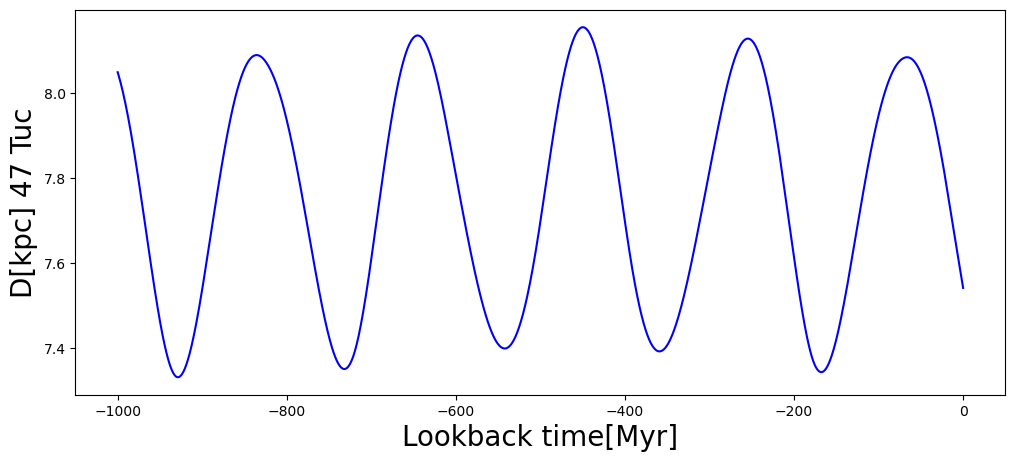

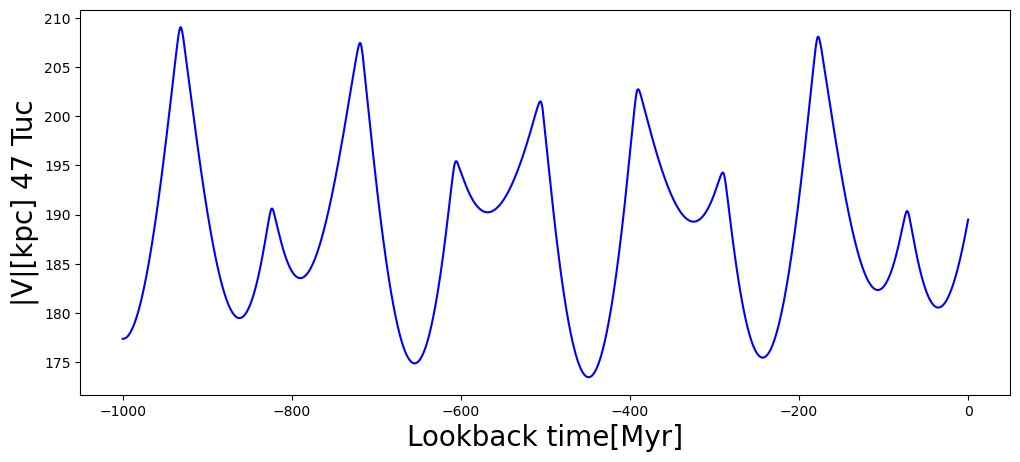

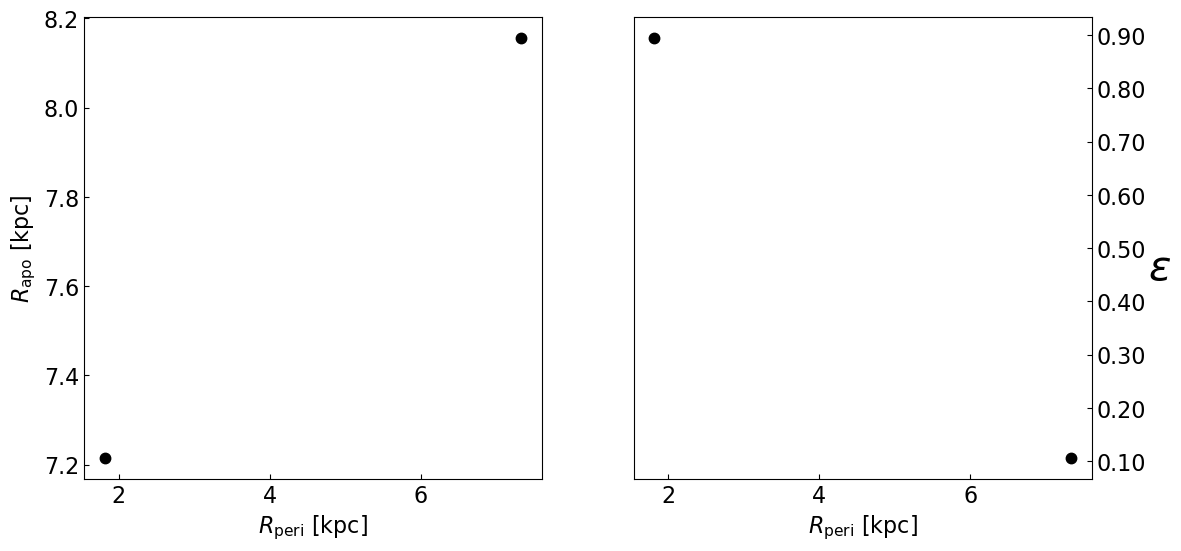

In [6]:
###########################################################################
### Reading from saved file instead of recalculating orbits ###############
###########################################################################
with open(pathoutputs+namefile, 'rb') as input:
    Testorbit1c  = pickle.load(input, encoding='latin1')

###########################################################################
## Getting Rperi, Rapo, etc from all orbits from the list in Testorbit1c.orbs[0][1][0]
Rperi_all = []
Rapo_all  = []
amaj_all  = []
bmin_all  = []
el_all    = []

for i in range(0,len(Testorbit1c.orbs)):
    Rperi_all.append(Testorbit1c.orbs[i][1][0][0])
    Rapo_all.append(Testorbit1c.orbs[i][1][0][2])
    amaj_all.append(Testorbit1c.orbs[i][1][0][4])
    bmin_all.append(Testorbit1c.orbs[i][1][0][5])
    el_all.append(Testorbit1c.orbs[i][1][0][6])
    
###################################################################################
#### Plotting orbits ##############################################################
plotorbplanesXYZ(Testorbit1c.orbs,15,f"T={Testorbit1c.paramtime[3][-1]}[Myr]",path=pathoutputs+"Figs",name=Testorbit1c.name)
plotorb(Testorbit1c.orbs[0][0],Testorbit1c.paramtime[3],1,'D[kpc] OmegaCen')
plotorbvel(Testorbit1c.orbs[0][0],Testorbit1c.paramtime[3],1,'|V|[kpc] OmegaCen')
plotorb(Testorbit1c.orbs[1][0],Testorbit1c.paramtime[3],1,'D[kpc] 47 Tuc')
plotorbvel(Testorbit1c.orbs[1][0],Testorbit1c.paramtime[3],1,'|V|[kpc] 47 Tuc')

### Plotting parameters Rperi, Rapo, Ell ########################
fig, axs = plt.subplots(1, 2,figsize=(13,6)) #, subplot_kw={'aspect': 'equal'})
ls = 16
ind = 0
axs[ind].plot(Rperi_all,Rapo_all,".k",markersize=15)
axs[ind].tick_params(axis='y', which='major', direction='in', labelsize=16)
axs[ind].tick_params(axis='y', which='minor', direction='in', labelsize=16)
axs[ind].tick_params(axis='x', which='major', direction='in', labelsize=16)
axs[ind].tick_params(axis='x', which='minor', direction='in', labelsize=16)
axs[ind].set_xlabel(r"$R_{\rm peri}$ [kpc]",size=ls)
axs[ind].set_ylabel(r"$R_{\rm apo}$ [kpc]",size=ls)
ind = 1
axs[ind].plot(Rperi_all,el_all,".k",markersize=15)
axs[ind].tick_params(axis='y', which='major', direction='in', labelsize=16)
axs[ind].tick_params(axis='y', which='minor', direction='in', labelsize=16)
axs[ind].tick_params(axis='x', which='major', direction='in', labelsize=16)
axs[ind].tick_params(axis='x', which='minor', direction='in', labelsize=16)
axs[ind].set_xlabel(r"$R_{\rm peri}$ [kpc]",size=ls)
axs[ind].set_ylabel(r"$\epsilon$",size=30,rotation=0,labelpad=10)
# labels = [item.get_text() for item in axs[ind].get_yticklabels()]
labels_e = np.arange(0,1.1,0.1) #[item for item in axs[ind].get_yticklabels()]

axs[ind].set_yticklabels([str(format(label, '.2f')) for label in labels_e])
axs[ind].yaxis.set_label_position("right")
axs[ind].yaxis.tick_right()


norbs_vt=2
norbs_ang=1
norbs_tot=2
integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 1 of 64
npars=2
 One orbit took 5.234786510467529 s
 All will take 0.17449867725372314 min
 Running time 5.234973430633545 s
orbit n=2/2 (100%)
 Running time 10.44912338256836 s
All calculations finished after 10.45 s, 0.17 min, 0.00 hrs
fig NOT saved


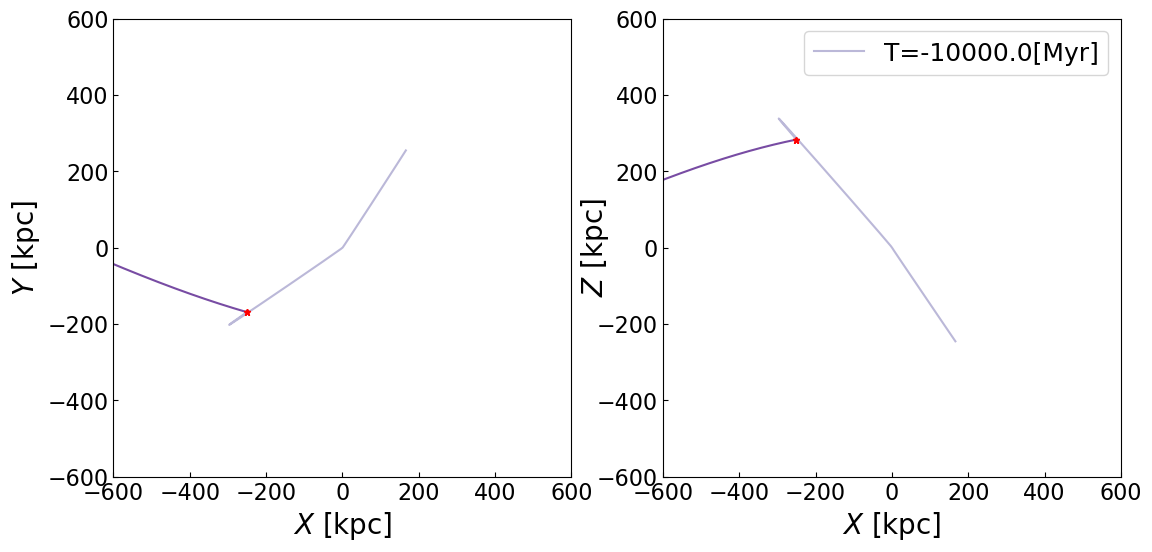

In [7]:
#########################################################################
## EXAMPLE 2: Loads Coordinates of Satellite galaxies to calculate orbits
#########################################################################
# LOADING OR DEFINE YOUR INITIAL CONDITIONS (IF NECESSARY) (SATELLITES, GC, ETC)
# Reading data as Class object
fnameIC='Data/Data_Inputs/Data_IC/satellites_IC_v3.pkl'
# fnameIC='Data/Data_Inputs/Data_IC/satellites_IC_v4.pkl'

with open(fnameIC, 'rb') as input:
    LeoT  = pickle.load(input, encoding='latin1')
#     Cet   = pickle.load(input, encoding='latin1')
    # EriII = pickle.load(input, encoding='latin1')
#     PhxI  = pickle.load(input, encoding='latin1')
#     IC10  = pickle.load(input, encoding='latin1')
#     IC1613  = pickle.load(input, encoding='latin1')
#     NGC6822  = pickle.load(input, encoding='latin1')
###############################################################
###############################################################
# LeoT1 = copy.deepcopy(LeoT)
LeoT1           = LeoT
LeoT1.name      = 'LeoT1'
LeoT1.setup     = MySetup(setup_name='Setup:Blana2020', case='case1').setup         # Load MW potential
# LeoT1.setup     = MySetup(setup_name='Setup:Blana2020', case='case1_cosmo').setup # Load MW potential, eq. motion with cosmic expansion (only for dt=0.1,1.0Myr, pre-computed libraries, more can be computed in DELOREAN_COSMO_v1.ipynb)
# LeoT1.setup     = MySetup(setup_name='Setup:Blana2020', case='case2').setup       # LOAD MW potential that varies with time: c-M redhisft relation
# LeoT1.setup     = MySetup(setup_name='Setup:Blana2020', case='case3').setup       # LOAD MW potential and M31 potential
# LeoT1.setup     = MySetup(setup_name='Setup:Blana2020', case='case4').setup       # LOAD MW potential and M31 potential that varies with time: c-M redhisft relation
# LeoT1.setup     = MySetup(setup_name='Setup:Blana2020', case='case4_cosmo').setup # Same as case4 + cosmic expansion
LeoT1.coordtype = 'Blana2020'
LeoT1.ncpu      = 1
LeoT1.paramtime = [0, -10000, 0.1]
LeoT1.paramvars = ParamSpaceSats(test=True)
# # LeoT1.paramvars = SetICveltanSat_Test(-10,0)
listobjects_init = [LeoT1]

###################################
### CALCULATE ORBITS ##############
listobjects_out  = ExploreParam_v2(listobjects_init)
LeoT1            = listobjects_out[0]

plotorbplanesXYZ(LeoT1.orbs,600,f"T={LeoT1.paramtime[3][-1]}[Myr]")

integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 3 of 64
npars=3
Starting time estimation of calculations for 3 orbits
len(nspeed) 1
One orbit calculation took 0.2583611011505127 seconds to run in 1 cpu.
1E6 orbits would take a total of 4306.0 min or 71.77 hrs to run in 1 cpu.
3 orbits could take a total of 0.01 min or 0.00 hrs to run  in 1 cpu.
3 orbits could take a total of 0.00 min or 0.00 hrs to run  in 3 cpu.
Starting parallel calculations for 3 orbits
len(orbs_chunk)= 3
len(orbs_chunk[0])= 1
len(orbs_chunk[0][0])= 1
All calculations finished after 0.59 s, 0.01 min, 0.00 hrs
fig NOT saved


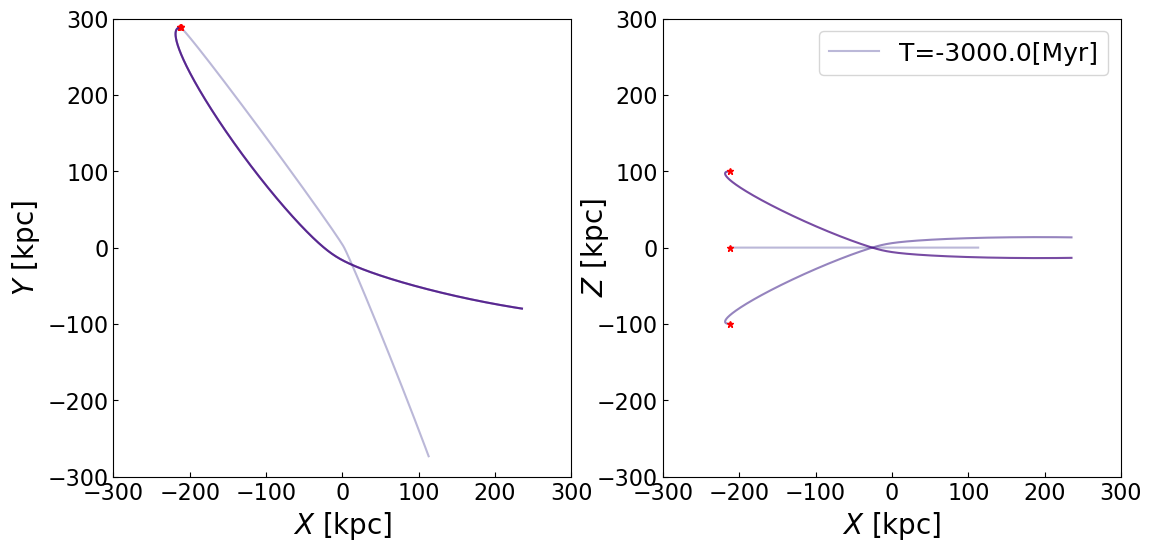

In [8]:
##############################################################
## EXAMPLE 4: setup of orbit of satellite galaxy (exo-Malin1)
##############################################################
exoMalin1           = Galaxy()
exoMalin1.name      = 'exoMalin1'
# exoMalin1.setup     = MySetup(setup_name='Setup:Malin1', case='case1').setup
exoMalin1.setup     = MySetup(setup_name='Setup:Malin1', case='case4').setup
# exoMalin1.setup     = MySetup(setup_name='Setup:Malin1', case='case1i').setup
# exoMalin1.ncpu      = 1
exoMalin1.ncpu      = 3
exoMalin1.coordtype = 'Cartesian'
exoMalin1.paramtime = [0, -3000., 1] # tinit, tfin, dt
x,y,z,vx,vy,vz      = -212.10945775, 288.39829738,-0, -5,0,0
incl                = 0.
exoMalin1.paramvars = [[x,y,z,vx,vy,vz]]
x,y,z,vx,vy,vz      = -212.10945775, 288.39829738,-100, 30,0,0
exoMalin1.paramvars.append([x,y,z,vx,vy,vz])
x,y,z,vx,vy,vz      = -212.10945775, 288.39829738,100, 30,0,0
exoMalin1.paramvars.append([x,y,z,vx,vy,vz])

exoMalin1.fitdata   = False
exoMalin1.obsdata   = [-100.,100.,10.]
listobjects_init    = [exoMalin1]

###################################
### CALCULATE ORBITS ##############
listobjects_out     = ExploreParam_v2(listobjects_init)
exoMalin1           = listobjects_out[0]

plotorbplanesXYZ(exoMalin1.orbs,300,f"T={exoMalin1.paramtime[3][-1]}[Myr]")

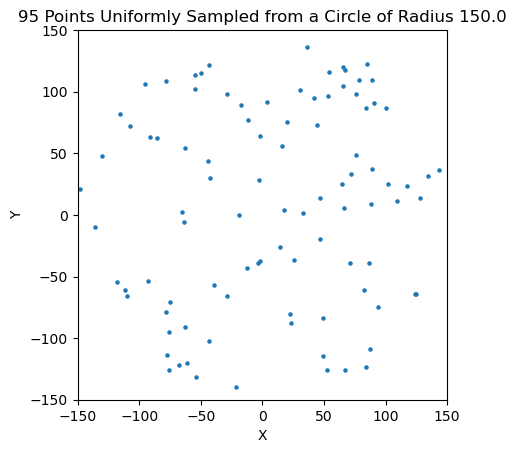

/data4/mblana/Research/DELOREAN/DELOREANv1/Code/DELOREAN_SETUP_v1.py:721: RuntimeWarning: invalid value encountered in divide
  acc  = -A*(rvin/rin*(1./(rin*(rin+rs)))-np.log(1.+rin/rs)/rin**2*rvin/rin)
/data4/mblana/Research/DELOREAN/DELOREANv1/Code/DELOREAN_SETUP_v1.py:721: RuntimeWarning: divide by zero encountered in divide
  acc  = -A*(rvin/rin*(1./(rin*(rin+rs)))-np.log(1.+rin/rs)/rin**2*rvin/rin)


vel=(-0.0, 165.75859703694766, 0.0) km/s
T=3.7064640891019427 Gyr


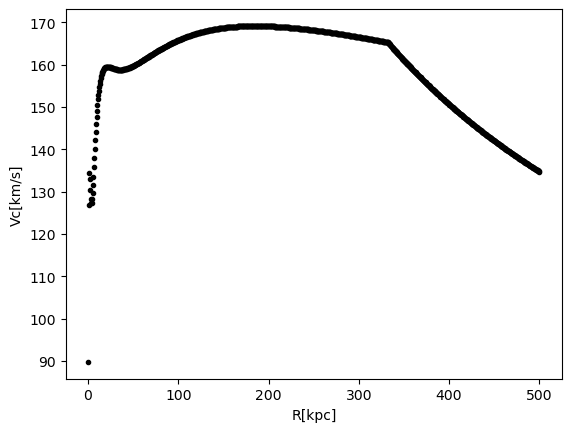

In [9]:
################################################################################
## EXAMPLE 5: Calculating (circular) orbits in Malin 1-type potential 
## Description: Uniform distribution of stars/sats that orbit a galaxy (Malin 1)
################################################################################
Malin1Disk            = Galaxy()
Malin1Disk.name       = 'Malin1Disk'
Malin1Disk.setup      = MySetup(setup_name='Setup:Malin1', case='case1').setup
# Malin1Disk.setup     = MySetup(setup_name='Setup:Malin1', case='case1i').setup
# Malin1Disk           = Galaxy()
# Malin1Disk.name      = 'Malin1'
Malin1Disk.ncpu      = 10
Malin1Disk.coordtype = 'Cartesian'
ti   = np.array([0.])
##################################################
def sample_points_from_circle(num_points, radius):
    # Generate random angles between 0 and 2*pi
    angles = np.random.uniform(0, 2 * np.pi, num_points)
    # Generate random radii between 0 and the square of the given radius
    # This ensures a uniform distribution of points across the circle's area
    radii = np.sqrt(np.random.uniform(0, radius**2, num_points))
    # Convert polar coordinates to Cartesian coordinates
    xi = radii * np.cos(angles)
    yi = radii * np.sin(angles)
    return xi, yi

# Number of points to sample
num_pointsi = 100
# num_pointsi = 1000

# Radius of the circle
radius = 150.0
# radius = 1050.0

# Sample points from the circle
x_rani, y_rani = sample_points_from_circle(num_pointsi, radius)


# Masking hole in disk!
x_h,y_h,R_h = -100.,0., 35.

mask = ((x_rani-x_h)**2 + (y_rani-y_h)**2)**0.5<=R_h

x_ran,y_ran = x_rani[~mask],y_rani[~mask]
num_points = len(x_ran)
z_ran    = np.random.uniform(-0.1, 0.1, len(x_ran))

# Plot the sampled points
plt.scatter(x_ran, y_ran, s=5)
# plt.scatter(x_rani[mask], y_rani[mask], s=5,color='r')

plt.xlim(-radius, radius)
plt.ylim(-radius, radius)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'{num_points} Points Uniformly Sampled from a Circle of Radius {radius}')
plt.show()

#######################################################################
## TESTING Vc of chosen potential
## Assigning Vrot = Vc to all stars/positions
ti   = np.array([0.])

r    = np.linspace(0,500,1000)
rvec = np.zeros((1000,3))
vc   = np.zeros((1000))
rvec[:,0] = r

for i in range(0,len(vc)):
    vc[i] = Vcirc(rvec[i,:],Malin1Disk,ti)[1]

plt.plot(r,vc,'.k')
plt.ylabel('Vc[km/s]')
plt.xlabel('R[kpc]')

# case = 'Malin1_Setup1'
ti        = np.array([0.])
rvec      = np.zeros((num_points,3))
velv      = np.zeros((num_points,3))
rvel      = np.zeros((6))
diskcoord = []
givesomeVz= False
# givesomeVz= True
 
for i in range(0,num_points):
    rvec[i,:] = x_ran[i],y_ran[i],z_ran[i]
    velv[i,:] = Vcirc(rvec[i,:],Malin1Disk,ti)
    if givesomeVz: velv[i,2] = np.random.normal(0,20,1) # gives sigma_z = 20km/s dispersion
    rvel      = np.hstack((rvec[i,:],velv[i,:]))
    diskcoord.append(rvel)
    
##################################################
## Calculating Circular Orbit Period for R=100kpc
# rvin = np.array([0,10,0])
# rvin = np.array([[0,10,0],[10,0,0],[0,-10,0],[-10,0,0]]).T
# rvin = np.array([[0,10,0],[10,0,0],[0,-10,0],[-10,0,0]])
rvin = np.array([100.,0.,0.])
nr   = np.sum(np.array(rvin)**2)**0.5
ti   = np.array([0.])
vel  = Vcirc(rvin,Malin1Disk,ti)
nvel = np.sum(np.array(vel)**2)**0.5
T    = (2.*np.pi*nr)/(nvel*kms2kpcGyr)
print(f"vel={vel} km/s")
print(f"T={T} Gyr")

###############################################################
## DEFINING ADDITIONAL PARATEMETERS
Malin1Disk.fitdata   = False
Malin1Disk.paramtime = [0, -T*Gyr2Myr, 1.]
# Malin1Disk.paramtime = [0, -2000., 1.0]
x,y,z,vx,vy,vz       = rvin[0],rvin[1],rvin[2],vel[0],vel[1],vel[2]
# Malin1_Setup1i for case with disk PA,incl =0, 35.
if Malin1Disk.setup.case == "Malin1_Setup1i": x,y,z,vx,vy,vz = rvin[0],rvin[1],rvin[2],vel[0],vel[1]*np.sin(incl/180*np.pi),-vel[1]*np.cos(incl/180*np.pi)
# Malin1Disk.paramvars = [[x,y,z,vx,vy,vz],[x,y,z,0.5*vx,0.5*vy,0.5*vz],[x,y,z,0.1*vx,0.1*vy,0.1*vz]]
Malin1Disk.paramvars = diskcoord
listobjects_init     = [Malin1Disk]

integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 10 of 64
npars=95
Starting time estimation of calculations for 95 orbits
len(nspeed) 1
One orbit calculation took 0.1832108497619629 seconds to run in 1 cpu.
1E6 orbits would take a total of 3053.5 min or 50.89 hrs to run in 1 cpu.
95 orbits could take a total of 0.29 min or 0.00 hrs to run  in 1 cpu.
95 orbits could take a total of 0.03 min or 0.00 hrs to run  in 10 cpu.
Starting parallel calculations for 95 orbits
len(orbs_chunk)= 11
len(orbs_chunk[0])= 9
len(orbs_chunk[0][0])= 1
All calculations finished after 2.80 s, 0.05 min, 0.00 hrs
fig NOT saved
fig saved in  /data4/mblana/Research/DELOREAN/DELOREANv1
fig saved in  /data4/mblana/Research/DELOREAN/DELOREANv1
fig saved in  /data4/mblana/Research/DELOREAN/DELOREANv1
fig saved in  /data4/mblana/Research/DELOREAN/DELOREANv1


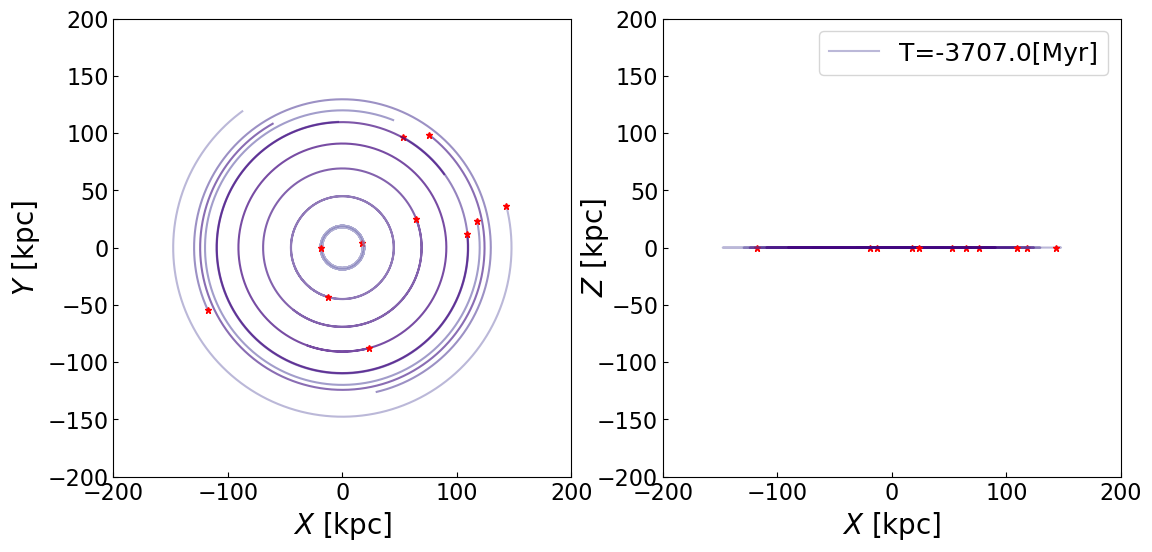

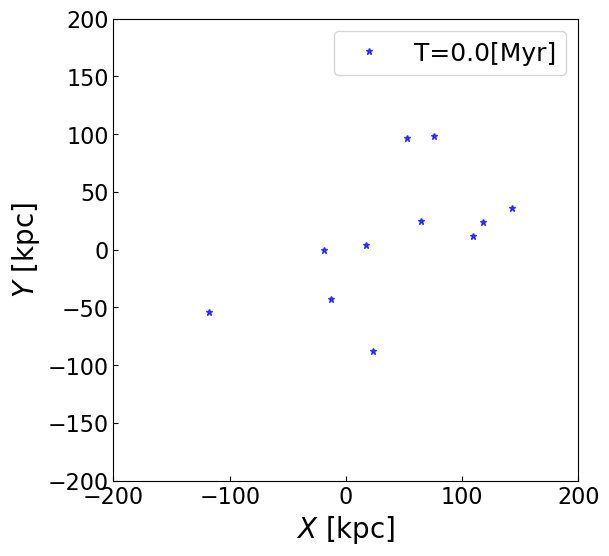

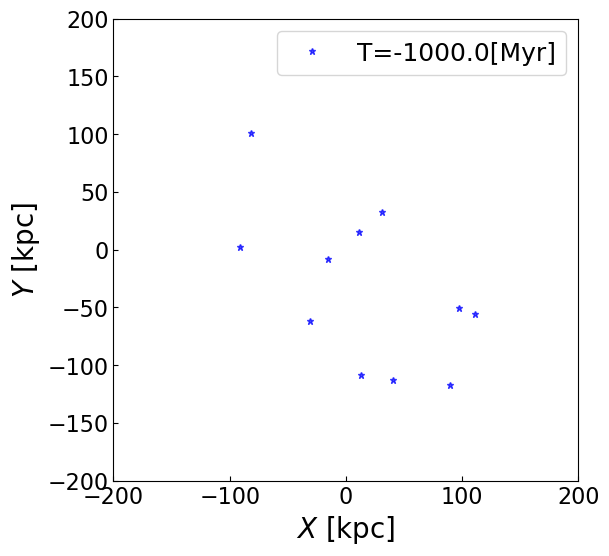

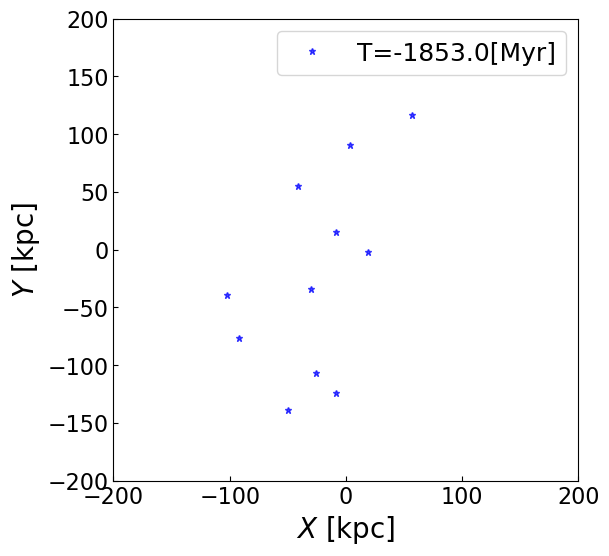

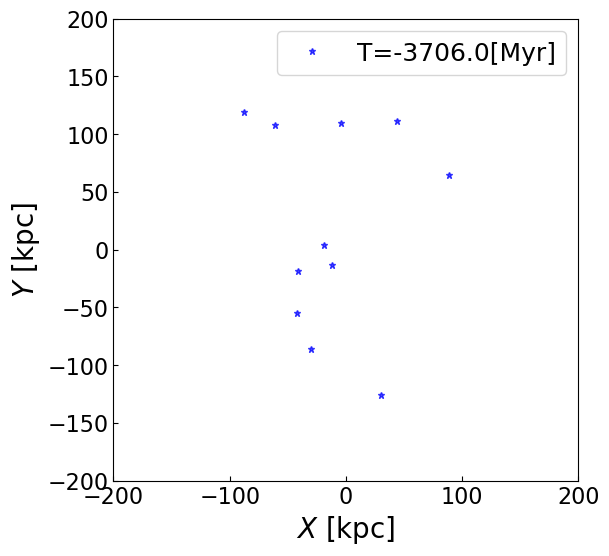

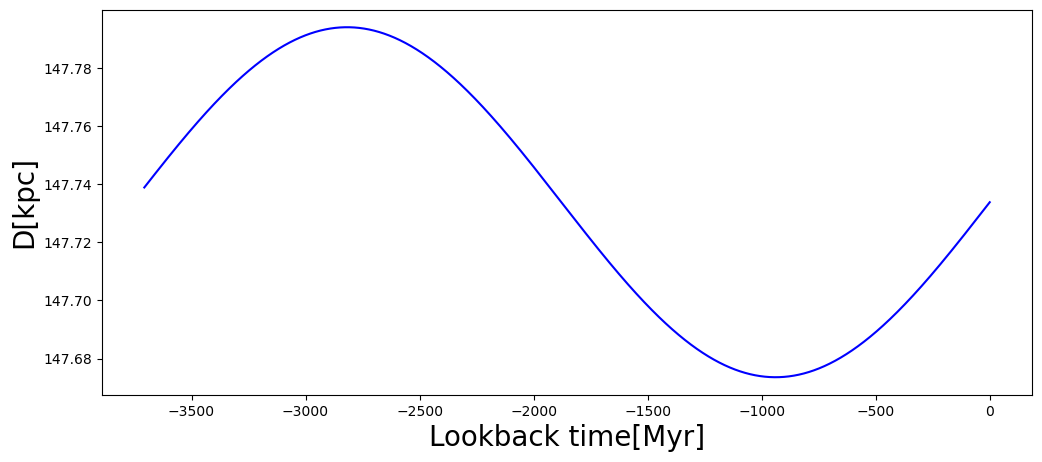

In [10]:
###################################
### CALCULATE ORBITS ##############
listobjects_out      = ExploreParam_v2(listobjects_init)
Malin1Disk           = listobjects_out[0]

saveorbs = False
if saveorbs: savelistclassobj(listobjects_out,'Data/Data_Outputs/Malin1orbs_v1.pkl')

################################################################################
### PLOTTING ORBITS ############################################################
plotorbplanesXYZ(Malin1Disk.orbs[:],200,f"T={Malin1Disk.paramtime[3][-1]}[Myr]",path='Data/Data_Outputs/Figs',name=Malin1Disk.name)
# plotorbplaneXY(Malin1Disk.orbs[:],200,f"T={Malin1Disk.paramtime[3][-1]}[Myr]")

#################################################################################
### PLOTTING SNAPSHOTS ##########################################################
snapshot = findsnap(0., Malin1Disk)
plotsnapshotplaneXY(Malin1Disk.orbs,snapshot,200,f"T={Malin1Disk.paramtime[3][snapshot]}[Myr]",path='Data/Data_Outputs/Figs',name=Malin1Disk.name)
snapshot = findsnap(-1000., Malin1Disk)
plotsnapshotplaneXY(Malin1Disk.orbs,snapshot,200,f"T={Malin1Disk.paramtime[3][snapshot]}[Myr]",path='Data/Data_Outputs/Figs',name=Malin1Disk.name)
snapshot = findsnap(-T*Gyr2Myr/2., Malin1Disk)
plotsnapshotplaneXY(Malin1Disk.orbs,snapshot,200,f"T={Malin1Disk.paramtime[3][snapshot]}[Myr]",path='Data/Data_Outputs/Figs',name=Malin1Disk.name)
# snapshot = findsnap(-2000., Malin1Disk)
# plotsnapshotplaneXY(Malin1Disk.orbs,snapshot,200,f"T={Malin1Disk.paramtime[3][snapshot]}[Myr]",path='Data/Data_Outputs/Figs',name=Malin1Disk.name)
snapshot = findsnap(-T*Gyr2Myr, Malin1Disk)
plotsnapshotplaneXY(Malin1Disk.orbs,snapshot,200,f"T={Malin1Disk.paramtime[3][snapshot]}[Myr]",path='Data/Data_Outputs/Figs',name=Malin1Disk.name)

##########################################################################
### PLOTTING         #####################################################
plotorb(Malin1Disk.orbs[0][0],Malin1Disk.paramtime[3],1,'D[kpc]')

integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected emcee ncpu: 10 of 64 available in the server
npars=3
testing emcee: lpost= -54.15682748419073


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [02:05<00:00,  1.57s/it]


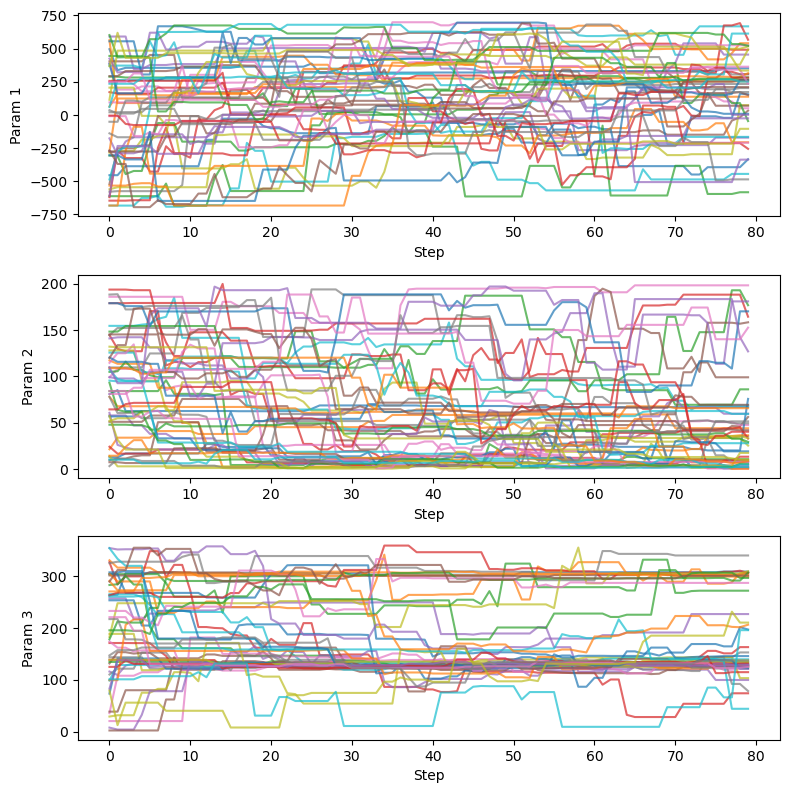

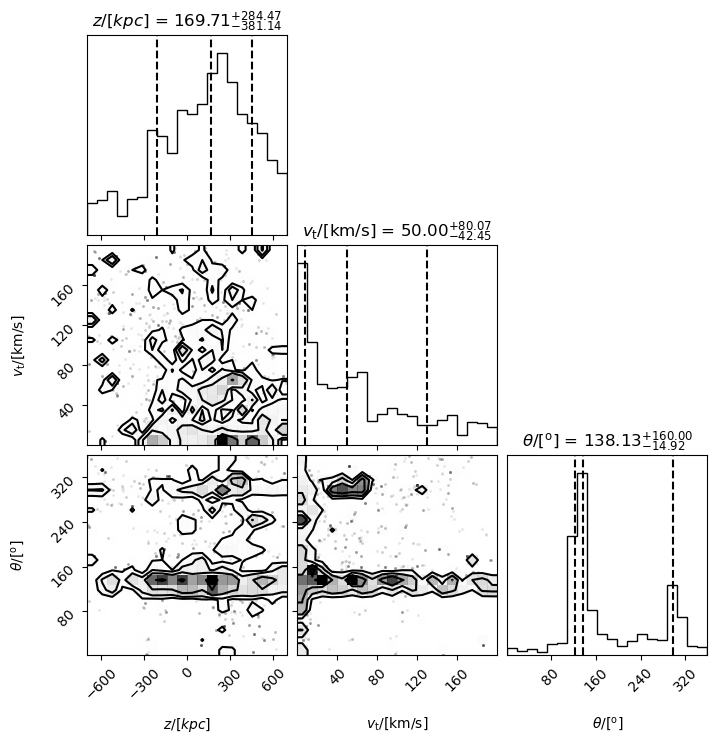

Best-Fitting Parameters: [-256.45055301   17.4523589   142.7002464 ]
Best-Fitting Parameter 50% Percentile: [169.71031307  49.99750624 138.13464519]
All calculations finished after 131.79 s, 2.20 min, 0.04 hrs
exoMalin1.bestparam= [[[-256.4505530121728, 17.45235889942613, 142.70024639741564], -0.6999820181952084], [[169.71031307207295, 49.99750624359925, 138.13464519213093], -0.39363289263910856]]
Found 2 orbits
Image
fig NOT saved


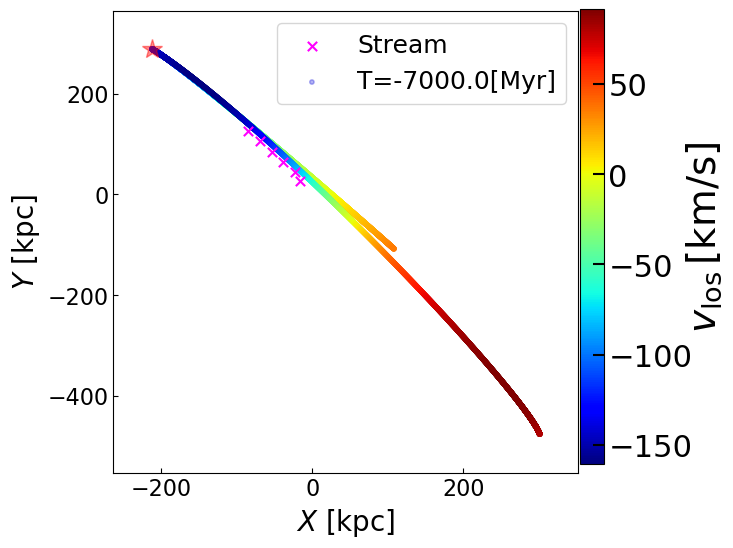

In [11]:
###############################################################
## EXAMPLE EMCEE : SETUP Object 3 #############################
###############################################################
## EXAMPLE 6: Orbit of satellite galaxy (exo-Malin1):
###############################################################
path_inputdata           = 'Data/Data_Inputs/Data_IC/Malin1/'
filedata                 = 'stellarstream_v1.txt'
dataobs                  = np.loadtxt(path_inputdata+filedata, dtype='str',delimiter=',')
header                   = dataobs[:, 0]
xobs                     = dataobs[0, 1:].astype(float)
yobs                     = dataobs[1, 1:].astype(float)
Robserr                  = np.zeros((len(xobs)))+10. # WARNING! NEED TO INCLUDE REALISTIC ERRORS!

exoMalin1                = Galaxy()
exoMalin1.name           = 'exoMalin1'
exoMalin1.coordtype      = 'Malin1'
exoMalin1.obsdata        = [xobs,yobs,Robserr]
exoMalin1.setup          = MySetup(setup_name='Setup:Malin1', case='case1').setup
exoMalin1.emcee.use      = True
# exoMalin1.emcee.ncpu     = 32
# exoMalin1.emcee.nwalkers = 100
# exoMalin1.emcee.nsteps   = 1000
exoMalin1.emcee.ncpu     = 10 # for testing
exoMalin1.emcee.nwalkers = 50 # for testing
exoMalin1.emcee.nsteps   = 80 # for testing

exoMalin1.paramtime      = [0, -7000., 1]
x,y,vz                   = -212.10945775, 288.39829738,140. # coordinates of Malin-1 (Check this!) Check Reshetnikov et al.
z,vt,vtang               = 0,50,45.
exoMalin1.paramvars      = [z,vt,vtang] # Note: the elements in this list represent each paramter to be fitted, contrary to normal orbital calculations where each element is instead a sub-lists with values for each paramater  
exoMalin1.paramvarsunit  = [r'$z/[kpc]$',r'$v_{\rm t}/[{\rm km/s}]$',r'$\theta /[\rm ^{o}]$']
exoMalin1.paramfix       = [x,y,vz]
# exoMalin1.paramvarlim    = [(-700.,700.),(0,200),(0,360)] # z, vt, theta
R,vlos                   = 358., 132. # kpc, km/s # From observations.
exoMalin1.paramfix2      = [R,vlos]
viratiolim               = [-0.1,0] # E=K+U, virial ratio expects K/U = -0.5, so range for bound systems should be : -1(limit bound-unbound)...-0.5 (virial)... 0(super bound). Here testing =-0.1 to get very bound orbit!
exoMalin1.paramvarlim    = [(-700.,700.),(0,200),(0,360),(viratiolim[0],viratiolim[1])] # z, vt, theta
listobjects_init         = [exoMalin1]

####################################################
### CALCULATE ORBITS ###############################
listobjects_out          = ExploreParam_v2(listobjects_init)
exoMalin1                = listobjects_out[0]
print("exoMalin1.bestparam=",exoMalin1.bestparam)
plotorbplaneXYVlos(exoMalin1,L=500)
# plotorbplaneXYVlos(exoMalin1,L=[-300,-300+450,-150,-150+450],sizeimage=[-550,440,-190,300]) ## INCLUDE FIGURE (NEEDS FIXING!)

Found 1 orbits
Image
fig NOT saved


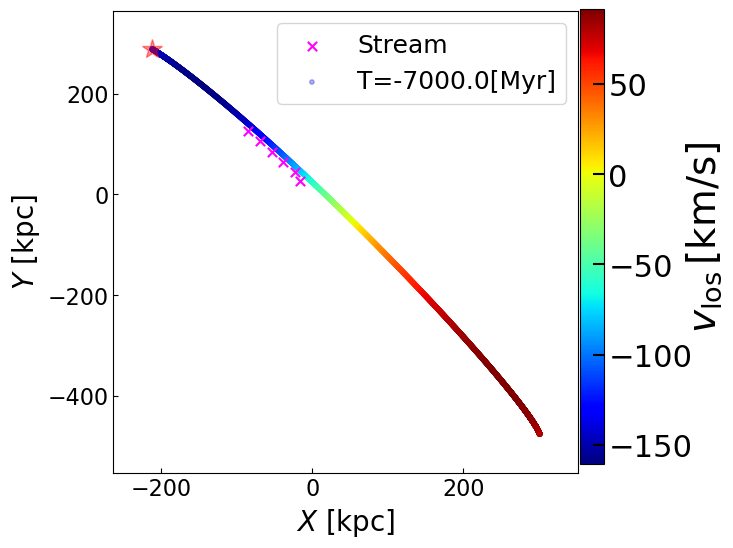

In [12]:
exoMalin1plot      = copy.deepcopy(exoMalin1)
id_orbit           = 1 # or =0, =1, =2, etc
exoMalin1plot.orbs = [exoMalin1plot.orbs[id_orbit]]
plotorbplaneXYVlos(exoMalin1plot,L=500)

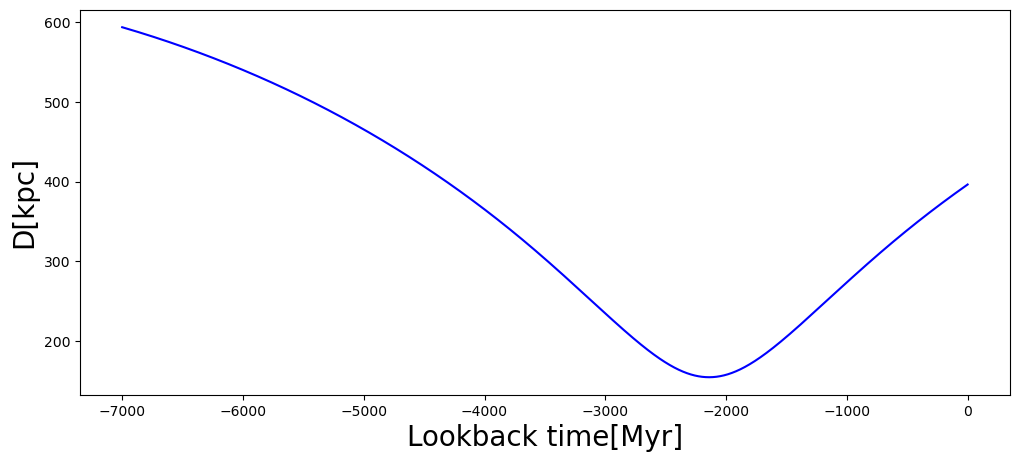

In [13]:
plotorb(exoMalin1plot.orbs[0][0],exoMalin1plot.paramtime[3],1,'D[kpc]')

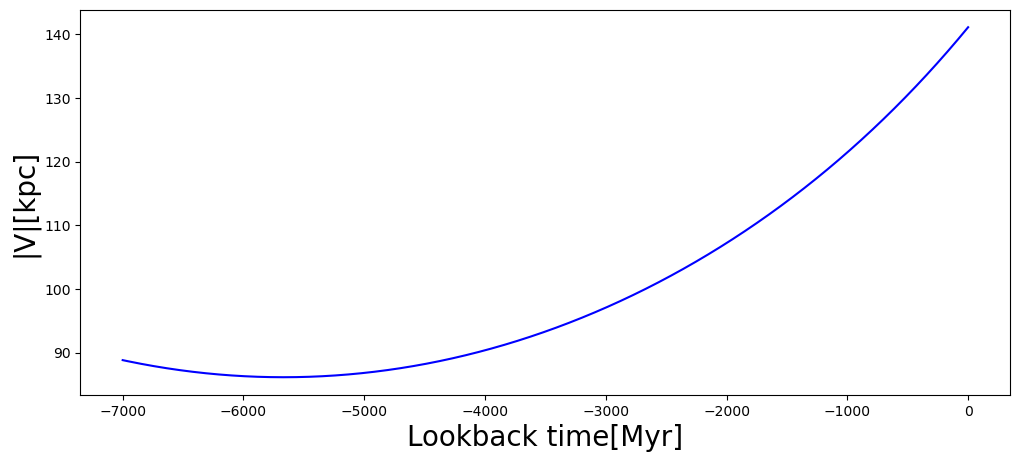

In [14]:
plotorbvel(exoMalin1.orbs[0][0],exoMalin1.paramtime[3],1,'|V|[kpc]')

fig NOT saved


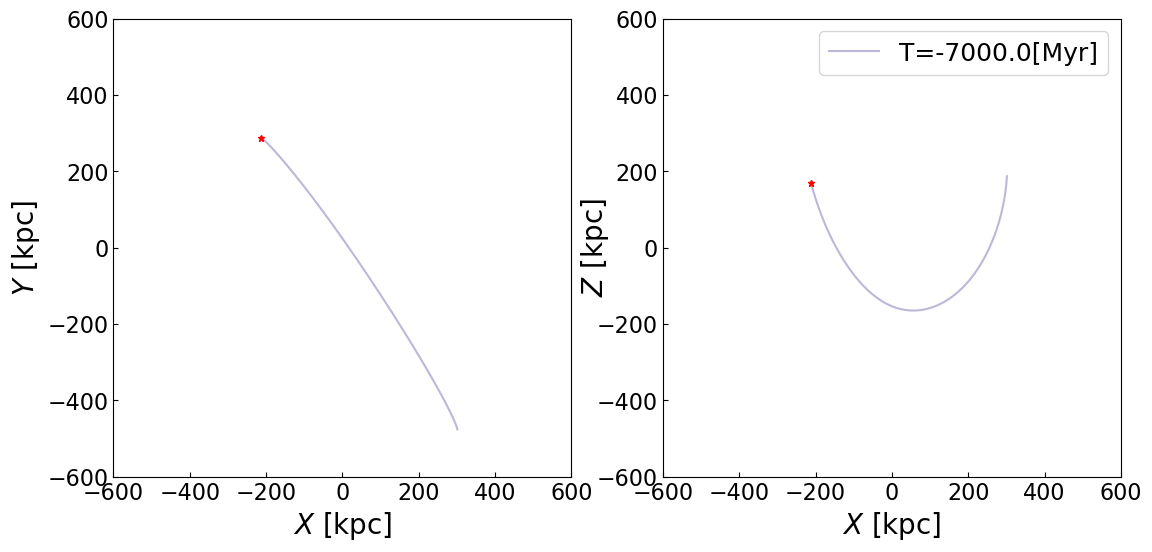

In [15]:
plotorbplanesXYZ(exoMalin1plot.orbs,600,f"T={exoMalin1plot.paramtime[3][-1]}[Myr]")

In [ ]:
##############################################################################
## EXAMPLES OLD VERSION DELOREAN (NEED UPDATES)###############################
##############################################################################

##############################################################################
## EXAMPLE 5: TEST Globular Cluster for Cesar NGC6569  #######################
##############################################################################
testorbs=False
if testorbs:
    fnameIC='Data/Data_IC/starclusters_IC.pkl'
    with open(fnameIC, 'rb') as input:
        NGC6569  = pickle.load(input, encoding='latin1')

        t_init, t_fin, dt = 0, -500., 0.1 # Myr, Myr, Myr
    GC_pos,GC_velos,GC_nut,GC_nutt = GetIC(NGC6569)
    # nvels,vAng=SetICveltanSat_Test(0.,0.)
    params = SetICveltanSat_Test(0.,0.)
    nvels,vAng=params[0]
    print("GC_pos=",GC_pos)
    GC_orbits1  = morbitsM('case1',np.array([nvels]),np.array([vAng]),t_init,t_fin,dt,GC_pos,GC_velos,GC_nut,GC_nutt)


    # TEST Globular Cluster for Cesar
    t_init, t_fin, dt = 0, -200., 0.05 # Myr, Myr, Myr
    GC_pos,GC_velos,GC_nut,GC_nutt = GetIC(NGC6569)
    nvels,vAng=SetICveltanSat_Test(0.,0.)
    print("GC_pos=",GC_pos)
    GC_orbits1  = morbitsM('case1',nvels,vAng,t_init,t_fin,dt,GC_pos,GC_velos,GC_nut,GC_nutt)
    t_init, t_fin, dt = 0, 200., 0.05 # Myr, Myr, Myr
    GC_orbits1fut  = morbitsM('case1fut',nvels,vAng,t_init,t_fin,dt,GC_pos,GC_velos,GC_nut,GC_nutt)
    plotorbplanesXYZ(GC_orbits1[:,:,0,0],4.5,r"T=-200[Myr]")
    plotorbplanesXYZ(GC_orbits1fut[:,:,0,0],4.5,r"T=200[Myr]")


    ##################################################
    # TEST Globular Cluster for Cesar
    fnameIC='Data/Data_IC/starclusters_IC.pkl'
    # class StarCluster:
    #     pass

    with open(fnameIC, 'rb') as input:
        NGC6569  = pickle.load(input, encoding='latin1')
    GC_pos,GC_velos,GC_nut,GC_nutt = GetIC(NGC6569)

    t_init, t_fin, dt = 0, -4000., 0.05 # Myr, Myr, Myr
    eM1_pos,eM1_velos,eM1_nut,eM1_nutt = np.array([-350.,350.,0]), np.array([2.,-20.,0]), np.array([0.,0.,0]), np.array([0.,0.,0])
    nvels,vAng=SetICveltanSat_Test(0.,0.)
    print("GC_pos=",GC_pos)
    eM1_orbits0  = morbitsM('case1',nvels,vAng,t_init,t_fin,dt,eM1_pos,eM1_velos,eM1_nut,eM1_nutt)
    eM1_orbits1  = morbitsM('Fornax_Setup1',nvels,vAng,t_init,t_fin,dt,eM1_pos,eM1_velos,eM1_nut,eM1_nutt)
    eM1_orbits2  = morbitsM('Fornax_Setup2',nvels,vAng,t_init,t_fin,dt,eM1_pos,eM1_velos,eM1_nut,eM1_nutt)

    #t_init, t_fin, dt = 0, 3000., 0.05 # Myr, Myr, Myr
    #eM1_orbits1fut  = morbitsM('Fornax_Setup1',nvels,vAng,t_init,t_fin,dt,eM1_pos,eM1_velos,eM1_nut,eM1_nutt)
    plotorbplanesXYZ(eM1_orbits0[:,:,0,0],400,f"T={t_fin}[Myr]")
    plotorbplanesXYZ(eM1_orbits1[:,:,0,0],400,f"T={t_fin}[Myr]")
    plotorbplanesXYZ(eM1_orbits2[:,:,0,0],400,f"T={t_fin}[Myr]")
    #plotorbplanesXYZ(eM1_orbits1[:,:,0,0],400,r"T=3000[Myr]")


    ########################################
    ## LEO M, LEO K
    t_init, t_fin, dt = 0, -12000., 0.5 # Myr, Myr, Myr
    eD_pos,eD_velos,eD_nut,eD_nutt = np.array([457.,0,0]), np.array([-100.,0.,0]), np.array([0.,0.,0]), np.array([0.,0.,0])
    nvels,vAng=SetICveltanSat_Test(0.,0.)
    #print("D_poseD1_posD_pos)
    eD_orbits0  = morbitsM('case1',nvels,vAng,t_init,t_fin,dt,eD_pos,eD_velos,eD_nut,eD_nutt)
    plotorb(eD_orbits0[:,:,0,0],eD_orbits0[:,6,0,0],1,'D[kpc]')


    t_init, t_fin, dt = 0, -12000., 0.5 # Myr, Myr, Myr
    eD_pos,eD_velos,eD_nut,eD_nutt = np.array([457.,0,0]), np.array([-0.,0.,0]), np.array([0.,0.,0]), np.array([0.,0.,0])
    nvels,vAng=SetICveltanSat_Test(0.,0.)
    #print("D_poseD1_posD_pos)
    eD_orbits0  = morbitsM('case1',nvels,vAng,t_init,t_fin,dt,eD_pos,eD_velos,eD_nut,eD_nutt)
    plotorb(eD_orbits0[:,:,0,0],eD_orbits0[:,6,0,0],1,'D[kpc]')


    t_init, t_fin, dt = 0, -12000., 0.5 # Myr, Myr, Myr
    eD_pos,eD_velos,eD_nut,eD_nutt = np.array([457.,0,0]), np.array([-70.,0.,0]), np.array([0.,0.,0]), np.array([0.,0.,0])
    nvels,vAng=SetICveltanSat_Test(0.,0.)
    #print("D_poseD1_posD_pos)
    eD_orbits0  = morbitsM('case2',nvels,vAng,t_init,t_fin,dt,eD_pos,eD_velos,eD_nut,eD_nutt)
    plotorb(eD_orbits0[:,:,0,0],eD_orbits0[:,6,0,0],1,'D[kpc]')


    t_init, t_fin, dt = 0, -12000., 0.5 # Myr, Myr, Myr
    eD_pos,eD_velos,eD_nut,eD_nutt = np.array([457.,0,0]), np.array([-65.,0.,0]), np.array([0.,0.,0]), np.array([0.,0.,0])
    nvels,vAng=SetICveltanSat_Test(0.,0.)
    #print("D_poseD1_posD_pos)
    eD_orbits0  = morbitsM('case2',nvels,vAng,t_init,t_fin,dt,eD_pos,eD_velos,eD_nut,eD_nutt)
    plotorb(eD_orbits0[:,:,0,0],eD_orbits0[:,6,0,0],1,'D[kpc]')

    t_init, t_fin, dt = 0, -12000., 0.5 # Myr, Myr, Myr
    eD_pos,eD_velos,eD_nut,eD_nutt = np.array([457.,0,0]), np.array([-65.,0.,0]), np.array([0.,0.,0]), np.array([0.,0.,0])
    nvels,vAng=SetICveltanSat_Test(0.,0.)
    #print("D_poseD1_posD_pos)
    eD_orbits0  = morbitsM('case2',nvels,vAng,t_init,t_fin,dt,eD_pos,eD_velos,eD_nut,eD_nutt)
    plotorb(eD_orbits0[:,:,0,0],eD_orbits0[:,6,0,0],1,'D[kpc]')

    GC_pos,GC_velos,GC_nut,GC_nutt